In [13]:
import pandas as pd 
import re
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from PIL import Image

from load_classes import fetch_classdict

In [3]:
paired_df = pd.read_csv('data-archive/paired_df.csv').drop('Unnamed: 0',axis=1)
engineered_df = pd.read_csv('engineered.csv').drop('Unnamed: 0',axis=1)

In [ ]:
# Things to take into account
'''
* File name format, ID_{left | right}.jpg
'''

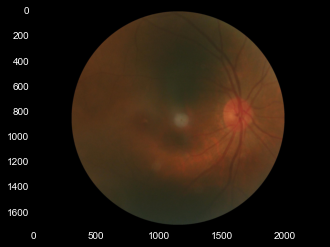

In [14]:
# testing 
sample_image = paired_df['filepath'][0]
plt.imshow(np.array(Image.open(sample_image)))
plt.grid = False

In [29]:
def plot_fundusid(idx, paired_df, diagnosis=None, contrast=True):
    docs ='''
= Takes the ID number of the Patient and plots the patient's fundus Imagery ( Left | Right ).
- ID Range: 1-4784.
    '''
    # presets
    plt.style.use('dark_background')
    
    if idx in paired_df['ID'].unique():
        if diagnosis == None:
            # forging data
            idxdf = paired_df[paired_df['ID']==idx][['ID','filepath','Diagnosis']].reset_index(drop=True)
            filepath_l = idxdf.loc[0,'filepath']
            filepath_r = idxdf.loc[1,'filepath']
            # Fundus Diagnosis
            diagnosis_l = idxdf.loc[0, 'Diagnosis']
            diagnosis_r = idxdf.loc[1, 'Diagnosis']

            left_arr = plt.imread(filepath_l)
            right_arr = plt.imread(filepath_r)


            fig, axs = plt.subplots(ncols=2,figsize=(15,7))

            axs[0].set_title(f'Left Fundus',size=15)
            axs[0].imshow(left_arr)

            axs[1].set_title(f'Right Fundus',size=15)
            axs[1].imshow(right_arr)

            fig.suptitle(f'Patient ID: {idx}, Diagnosis - {diagnosis_l}',size=20)
            plt.show()
#             plt.savefig(f'Patient_ID{idx}')


        else:
            try:
                diagnosis_df = paired_df[paired_df['Diagnosis'].str.contains(diagnosis)]
                idxdf = diagnosis_df.iloc[0:2,:][['ID','filepath']].reset_index(drop=True)
                filepath_l = idxdf.loc[0,'filepath']
                filepath_r = idxdf.loc[1,'filepath']

                left_arr = plt.imread(filepath_l)
                right_arr = plt.imread(filepath_r)
            except:
                print('No Data Found')


            fig, axs = plt.subplots(ncols=2,figsize=(15,7))

            axs[0].set_title(f'Left Fundus',size=15)
            axs[0].imshow(left_arr)

            axs[1].set_title(f'Right Fundus',size=15)
            axs[1].imshow(right_arr)
            
            fig.suptitle(f'Diagnosis - {diagnosis}',size=20)
            plt.show()
#             plt.savefig(f'Patient_ID{idx}')
    else:
        print('Choose a different ID')


 


       



In [30]:
engineered_df[engineered_df['ID']==250]

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,left_pathological,right_pathological,left_glaucoma,right_glaucoma,left_diabetis,right_diabetis,left_cataract,right_cataract,left_normal,right_normal
214,250,60,Male,250_left.jpg,250_right.jpg,mild nonproliferative retinopathy,macular epiretinal membrane,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3407,250,60,Male,250_left.jpg,250_right.jpg,mild nonproliferative retinopathy,macular epiretinal membrane,0,1,0,...,0,0,0,0,1,0,0,0,0,0


dict_values(['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'Age', 'Hypertension', 'Pathological', 'Other'])


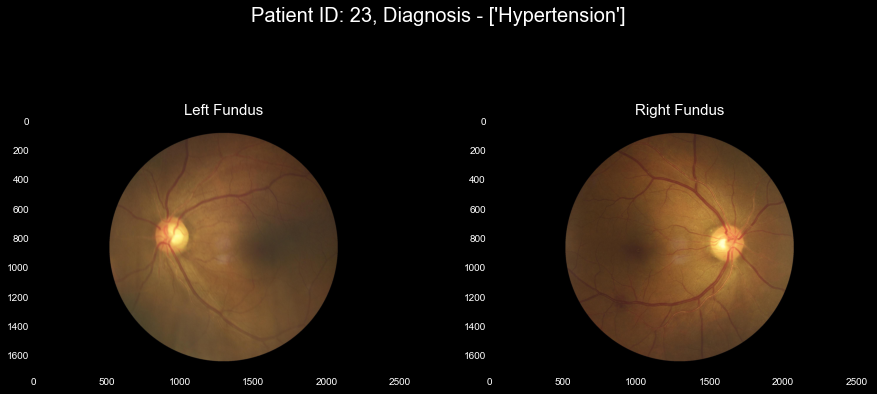

<Figure size 432x288 with 0 Axes>

In [32]:
class_dict = fetch_classdict().values()
print(class_dict)
plot_fundusid(23, paired_df,)


### Constrasting Samples

In [76]:
coi = fetch_classdict(mode='coi')
print(coi.values())
import random
from skimage.transform import resize

root_path = '../../ODIR-data/ODIR-5K/ODIR-5K/'
illustration_path = _
def contrast_fundus(illustration=False, interest='Diabetes', contrast='Cataract'):
    coi = fetch_classdict(mode='coi')
    if contrast in coi.values() and interest in coi.values():
        interest_item = random.choice(os.listdir(os.path.join(root_path,'Diabetes')))
        contrast_item = random.choice(os.listdir(os.path.join(root_path, contrast)))
        
        interest_item_path = os.path.join(root_path, 'Diabetes',interest_item)
        contrast_item_path = os.path.join(root_path, contrast, contrast_item)
        
        interest_arr = plt.imread(interest_item_path)
        contrast_arr = plt.imread(contrast_item_path)
        
        interest_arr = resize(interest_arr, (512,512))
        contrast_arr = resize(contrast_arr, (512,512))
        
        fig, axs = plt.subplots(ncols=2,figsize=(15,7))

        axs[0].set_title(f'{interest}',size=15)
        axs[0].imshow(interest_arr)

        axs[1].set_title(f'{contrast}',size=15)
        axs[1].imshow(contrast_arr)

#         fig.suptitle(f'Diagnosis - {diagnosis}',size=20)
        plt.show()
        
        
    else:
        print('Only select from the classes of interest')
        
    

dict_values(['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'Pathological'])


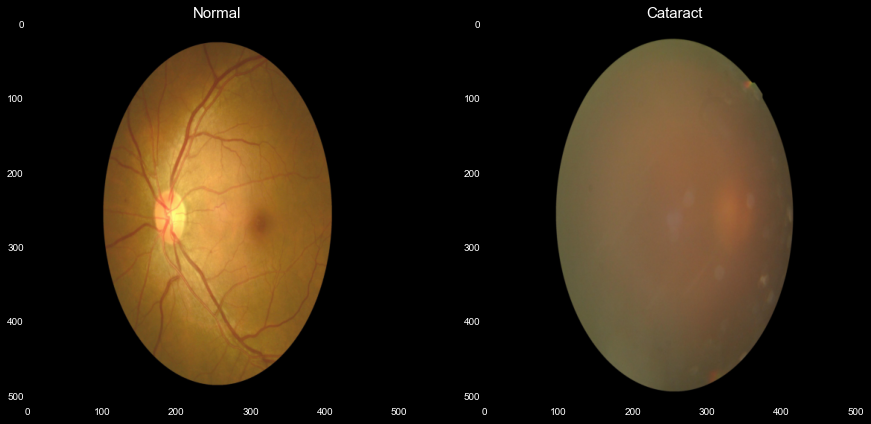

In [81]:
contrast_fundus(interest='Normal', contrast='Cataract')